In [38]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [4]:
df = pd.read_csv('VirusSample.csv') 

In [5]:
df.sample(n=5).head()

,file,api,class
4515,635ea3e7225dc9c39c42356fa569edda31b3a052,"CoCreateInstance,CLSIDFromString,CoInitialize,...",Trojan
615,6c4973c1d293ea2afab357b6815e17171c833abc,"LoadLibraryA,GetProcAddress",Trojan
5129,2ac6a33ab568d0f0a0f2196e9f6c2c3ce5d81de3,"MethCallEngine,EVENT_SINK_AddRef,DllFunctionCa...",Trojan
8773,eb651ad5dbe8836683352824451a7db231fbb3dc,"ExitProcess,GetEnvironmentStringsA,CloseHandle...",Backdoor
3767,8f40d3686ba7a49468787173b877b44968fe964c,"LoadLibraryA,GetProcAddress,VirtualProtect,Vir...",Trojan


In [6]:
df["class"].unique()

array(['Virus', 'Riskware', 'Spyware', 'Downloader', 'Dropper', 'Agent',
       'Adware', 'Trojan', 'Backdoor', 'Worms', 'Ransomware', 'Keylogger',
       'Crypt'], dtype=object)

In [7]:
print('Virus:', len(df[df['class']=='Virus']))
print('Riskware:', len(df[df['class']=='Riskware']))
print('Spyware:', len(df[df['class']=='Spyware']))
print('Downloader:', len(df[df['class']=='Downloader']))
print('Dropper:', len(df[df['class']=='Dropper']))
print('Agent:', len(df[df['class']=='Agent']))
print('Adware:', len(df[df['class']=='Adware']))
print('Trojan:', len(df[df['class']=='Trojan']))
print('Backdoor:', len(df[df['class']=='Backdoor']))
print('Worms:', len(df[df['class']=='Worms']))
print('Ransomware:', len(df[df['class']=='Ransomware']))
print('Keylogger:', len(df[df['class']=='Keylogger']))
print('Crypt:', len(df[df['class']=='Crypt']))

Virus: 2367
Riskware: 4
Spyware: 11
Downloader: 31
Dropper: 4
Agent: 102
Adware: 222
Trojan: 6153
Backdoor: 447
Worms: 441
Ransomware: 10
Keylogger: 1
Crypt: 2


<AxesSubplot: xlabel='class', ylabel='count'>

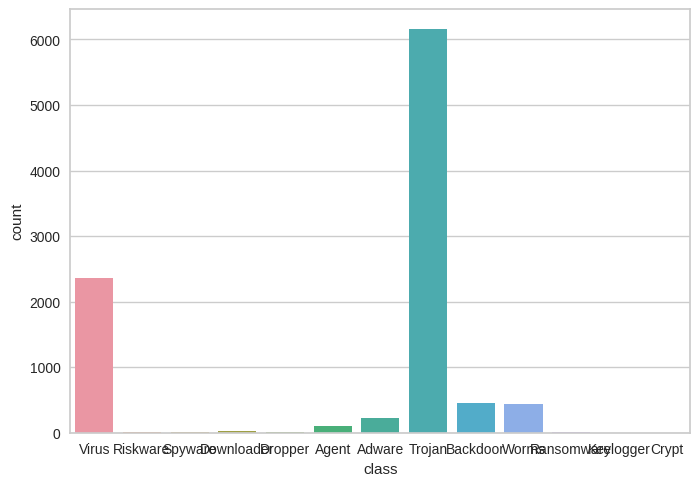

In [8]:
sns.countplot(x=df['class'], data=df)

In [10]:
newClasses = ['Virus', 'Agent', 'Adware', 'Trojan', 'Backdoor', 'Worms','Downloader']
df = df.loc[df["class"].isin(newClasses)]

In [11]:
df2 = df.copy()

In [22]:
df2["api"].apply(lambda x: ' '.join(x.split(",")))
df2

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus
...,...,...,...
9790,3b91b43ad8a25a8e9e52f938473f5bb05fb4d530ff4b22...,"NtResetWriteWatch,GetClipboardViewer,GetConsol...",Trojan
9791,54315d591d2855fc794ba5f61012efdd92b489576e4aa5...,"RtlpNtEnumerateSubKey,NtFlushWriteBuffer,ReadC...",Trojan
9792,dcb7507fa10537d2e3da2ea22ec6346e02a0926ad64d76...,"ZwNotifyChangeDirectoryFile,GetCursor,GetConso...",Trojan
9793,cf441d0a2de25c6207fc782e190ce5302171d5e28ce41b...,"ILSaveToStream,OleQueryLinkFromData,VarUdateFr...",Trojan


In [14]:
clf = RandomForestClassifier(max_depth=12, random_state=42, n_estimators = 200)

In [24]:
y = df["class"]
x = df2[['file','api']]

In [31]:
tv = TfidfVectorizer(min_df=0.15, max_df=1., use_idf=True, ngram_range=(1,2))
tv_matrix = tv.fit_transform(df2["api"])
tv_matrix_array = tv_matrix.toarray()
vocabulary = tv.get_feature_names_out()
X = pd.DataFrame(tv_matrix_array, columns=vocabulary)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)

In [37]:
predictions= clf.predict(X_test)

In [32]:
cv = KFold(n_splits=10)
cross_val_score(clf, X, y, cv=cv)

array([0.89355169, 0.85977482, 0.93858751, 0.72848361, 0.85655738,
       0.84631148, 0.85553279, 0.85860656, 0.83196721, 0.73258197])

In [39]:
confusionMatrix = confusion_matrix(y_test, predictions)

In [40]:
confusionMatrix

array([[  38,    0,    1,    0,   20,    4,    0],
       [   0,    6,    0,    0,   21,    2,    0],
       [   0,    0,  110,    0,   17,    0,    0],
       [   2,    0,    0,    2,    5,    0,    0],
       [   4,    1,    0,    0, 1597,  247,    3],
       [   1,    0,    0,    1,   35,  668,    1],
       [   4,    0,    0,    0,   35,   45,   59]])

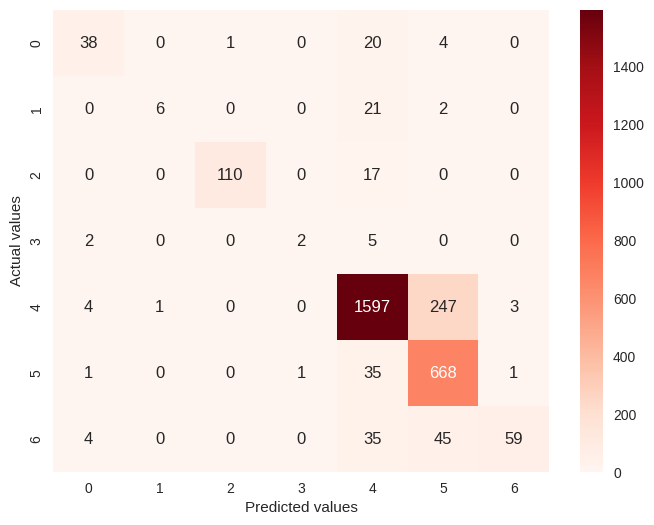

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(confusionMatrix,annot=True,cmap='Reds',fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [43]:
classification_report_result = classification_report(y_test,predictions)
print(classification_report_result)

              precision    recall  f1-score   support

      Adware       0.78      0.60      0.68        63
       Agent       0.86      0.21      0.33        29
    Backdoor       0.99      0.87      0.92       127
  Downloader       0.67      0.22      0.33         9
      Trojan       0.92      0.86      0.89      1852
       Virus       0.69      0.95      0.80       706
       Worms       0.94      0.41      0.57       143

    accuracy                           0.85      2929
   macro avg       0.83      0.59      0.65      2929
weighted avg       0.87      0.85      0.84      2929

